# Power analysis

In [1]:
# Load library
library(pwr)

# Detemine sample size for specified variables
r <- 0.25
sig <-0.05
power <- 0.8
p.out <- pwr.r.test(
  n = NULL,
  r = r,
  sig.level = sig,
  power = power,
  alternative = 'two.sided'
)
p.out


     approximate correlation power calculation (arctangh transformation) 

              n = 122.4466
              r = 0.25
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


# Figure 4

,X,fileno,wordcount,sum,count,average,lang,age,score,no1_score,error_per100
,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,0,doc1298,219,12,10,1.200000,Korean,<16,32,4.3,5.479452
2,1,doc1071,175,46,9,5.111111,Japanese,16-20,15,1.3,26.285714
3,2,doc524,159,25,13,1.923077,Chinese,16-20,24,3.1,15.723270
4,3,doc1111,222,4,16,0.250000,Japanese,<16,37,5.1,1.801802
5,4,doc1893,178,16,14,1.142857,Korean,21-25,32,3.3,8.988764
6,5,doc2168,169,17,13,1.307692,Japanese,16-20,30,4.1,10.059172


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wordcount,1,232,186.724138,37.850374,179.000000,184.134409,35.582400,98.0000000,343.00000,245.00000,0.7995693,1.107580,2.4849988
sentence,2,232,13.370690,3.460426,13.000000,13.080645,2.965200,7.0000000,29.00000,22.00000,1.0514566,2.060513,0.2271881
error,3,232,17.693966,10.397151,15.000000,16.424731,8.895600,1.0000000,64.00000,63.00000,1.4335191,2.816055,0.6826064
error_per100,4,232,9.604535,5.278612,8.443331,9.068062,4.684116,0.5319149,27.58621,27.05429,0.9882856,0.921771,0.3465578


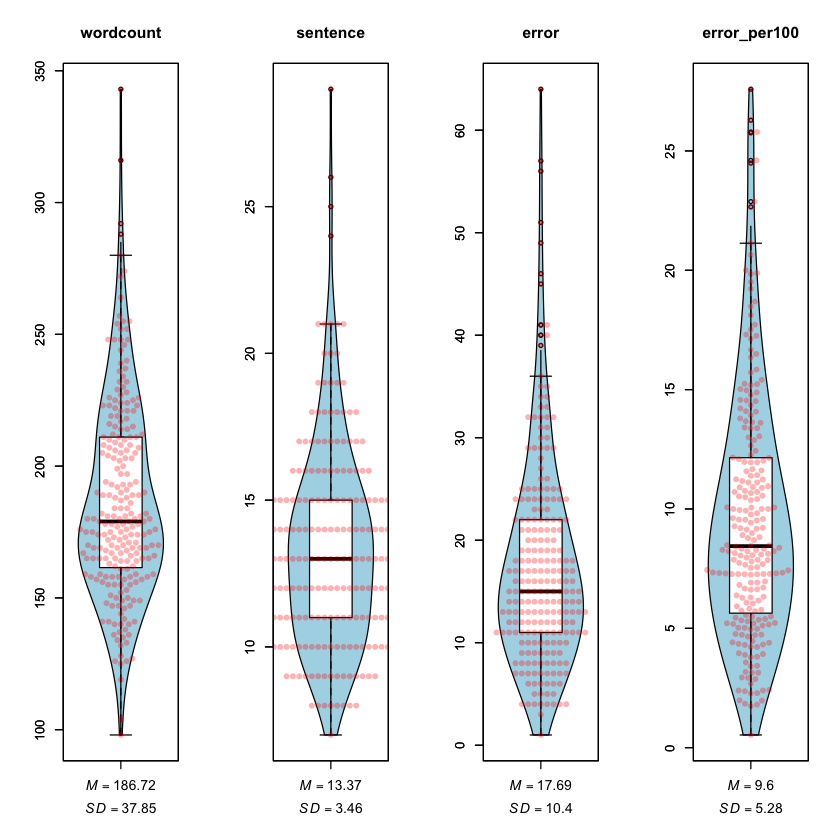

In [6]:
options(warn = -1)

dat <- read.csv("merged_df_basicstats.csv")
head(dat)
library(psych)
selected_columns <- dat[c("wordcount", "count", "sum", "error_per100")]
colnames(selected_columns) <- c("wordcount", "sentence", "error", "error_per100")
describe(selected_columns)

library(beeswarm)
library(vioplot)
par(mfrow = c(1, 4), mar = c(5, 4, 4, 2))

variables <- c("wordcount", "sentence", "error", "error_per100")
for (var in variables) {
  vioplot(selected_columns[[var]], col = "lightblue", names = "")
  boxplot(selected_columns[[var]], add = TRUE, col = "white", names = "")
  beeswarm(selected_columns[[var]], method = "swarm", pch = 16, col = rgb(1, 0, 0, 0.3), add = TRUE)
  mean_val <- mean(selected_columns[[var]])
  sd_val <- sd(selected_columns[[var]])
  mtext(side = 1, line = 1, text = bquote(italic(M) == .(round(mean_val, 2))), cex = 0.7)
  mtext(side = 1, line = 2.5, text = bquote(italic(SD) == .(round(sd_val, 2))), cex = 0.7)
  title(main = var)
}

# ChatGPT's evaluation consistency

,ID,fileno,GPT1st,GPT2nd
,<int>,<chr>,<int>,<int>
1,0,doc1298,9,11
2,1,doc1071,31,37
3,2,doc524,19,20
4,3,doc1111,5,4
5,4,doc1893,17,16
6,5,doc2168,7,7


,GPT1st,GPT2nd
GPT1st,1.000,0.958
GPT2nd,0.958,1.000


[1] 0.946 0.967

 Krippendorff's alpha

 Subjects = 232 
   Raters = 2 
    alpha = 0.956 

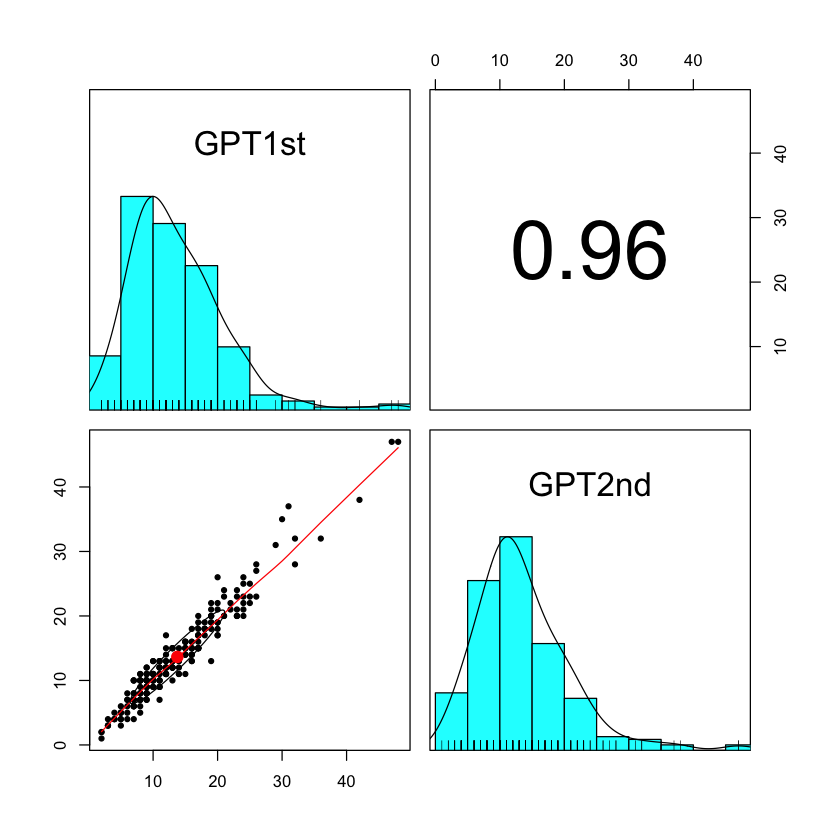

In [8]:
options(warn = -1)

dat <- read.csv("ChatGPT_AgreementCheck.csv", header=T)
head(dat)

round(cor(cbind(dat[,3:4]), method = "spearman", use = "pairwise.complete.obs"),3)
r <- cor(dat$GPT1st, dat$GPT2nd, method = "spearman", use = "complete")
n <- length(dat$GPT1st)
round(r.con(r, n), 3)

library(psych)
pairs.panels(dat[,3:4], method = "spearman")

library(irr)
kripp.alpha(t(dat[,3:4]), method="ordinal")

# Figure 6 (Raincloud Plot)

ID,fileno,lang,test_total,writing_score,Method,Errors
<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>
176,doc100,Korean,29,3.3,Human,6.818182
176,doc100,Korean,29,3.3,ChatGPT,11.363636
176,doc100,Korean,29,3.3,Grammarly,10.227273
112,doc1002,Korean,32,4.2,Human,3.137255
112,doc1002,Korean,32,4.2,ChatGPT,2.352941
112,doc1002,Korean,32,4.2,Grammarly,4.313725


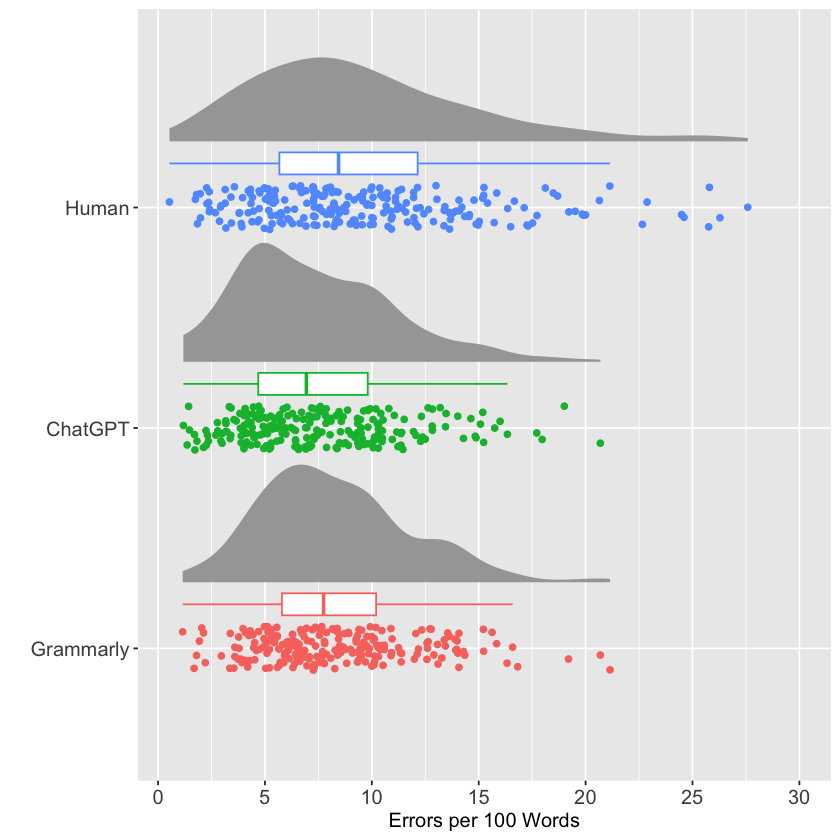

In [10]:
options(warn = -1)

library(tidyverse)
data <- read.csv("accuracy_df.csv")
# Rename "human" column to "Human"
data <- data %>%
  rename(Human = human)
# Convert to long format
data_long <- data %>%
  pivot_longer(cols = c("Human", "ChatGPT", "Grammarly"),
               names_to = "Method",
               values_to = "Errors")
head(data_long)

library(ggplot2)
library(ggdist)
data_long$Method <- factor(data_long$Method, levels = c("Grammarly", "ChatGPT", "Human"))
ggplot(data_long, aes(x = Errors, y = Method, color = Method)) +
  stat_halfeye(
    point_color = NA, .width = 0, height = 0.6,
    position = position_nudge(y = 0.3)
  ) +
  geom_point(position = position_jitter(width = 0, height = 0.1, seed = 1)) +
  geom_boxplot(
    position = position_nudge(y = 0.2),
    width = 0.1, outlier.shape = NA
  ) +
  labs(y = "", x = "Errors per 100 Words") +
  theme(legend.position = "none",
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 12),
        axis.text.x = element_text(size = 12)) + 
  scale_x_continuous(breaks = seq(0, 30, by = 5), limits = c(NA, 30))

# Table 1 (Descriptive Stats) and Figure 7

In [12]:
options(warn = -1)

dat <- read.csv("accuracy_df.csv")
colnames(dat)[5:8] <- c("Writing Score", "Human", "ChatGPT", "Grammarly")
head(dat)

library(psych)
describe(dat[,5:8])

# Multivariate and univariate normality test
library(MVN)
mvn(dat[,5:8], univariateTest="SW")
ks.test(scale(dat[,5]), "pnorm")
ks.test(scale(dat[,6]), "pnorm")
ks.test(scale(dat[,7]), "pnorm")
ks.test(scale(dat[,8]), "pnorm")

,ID,fileno,lang,test_total,Writing Score,Human,ChatGPT,Grammarly
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,176,doc100,Korean,29,3.3,6.818182,11.363636,10.227273
2,112,doc1002,Korean,32,4.2,3.137255,2.352941,4.313725
3,151,doc1008,Korean,34,4.2,4.977376,3.167421,5.429864
4,90,doc1015,Chinese,37,4.1,3.921569,2.941176,5.882353
5,190,doc102,Korean,23,2.3,13.043478,10.326087,13.586957
6,133,doc1031,Korean,20,2.3,8.695652,8.074534,4.968944


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Writing Score,1,232,3.462500,0.9856629,3.300000,3.430645,1.334340,1.2000000,5.30000,4.10000,0.1751812,-0.7734787,0.06471194
Human,2,232,9.604535,5.2786118,8.443331,9.068062,4.684116,0.5319149,27.58621,27.05429,0.9882856,0.9217710,0.34655784
ChatGPT,3,232,7.444155,3.6759106,6.937380,7.131406,3.754640,1.1834320,20.68966,19.50622,0.8069271,0.4909795,0.24133535
Grammarly,4,232,8.327094,3.5530482,7.744207,8.090418,3.344438,1.1494253,21.14286,19.99343,0.7244198,0.6245972,0.23326904


$multivariateNormality
           Test       HZ      p value MVN
1 Henze-Zirkler 1.497827 1.218994e-07  NO

$univariateNormality
          Test      Variable Statistic   p value Normality
1 Shapiro-Wilk Writing Score    0.9302  <0.001      NO    
2 Shapiro-Wilk     Human        0.9373  <0.001      NO    
3 Shapiro-Wilk    ChatGPT       0.9544  <0.001      NO    
4 Shapiro-Wilk   Grammarly      0.9664  <0.001      NO    

$Descriptives
                n     Mean   Std.Dev   Median       Min      Max     25th
Writing Score 232 3.462500 0.9856629 3.300000 1.2000000  5.30000 3.100000
Human         232 9.604535 5.2786118 8.443331 0.5319149 27.58621 5.674603
ChatGPT       232 7.444155 3.6759106 6.937380 1.1834320 20.68966 4.686819
Grammarly     232 8.327094 3.5530482 7.744207 1.1494253 21.14286 5.793651
                   75th      Skew   Kurtosis
Writing Score  4.200000 0.1751812 -0.7734787
Human         12.142720 0.9882856  0.9217710
ChatGPT        9.806929 0.8069271  0.4909795
Grammarly     10.200130 0.7244198  0.6245972


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  scale(dat[, 5])
D = 0.19047, p-value = 9.774e-08
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  scale(dat[, 6])
D = 0.096923, p-value = 0.02559
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  scale(dat[, 7])
D = 0.085822, p-value = 0.06558
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  scale(dat[, 8])
D = 0.076412, p-value = 0.1331
alternative hypothesis: two-sided


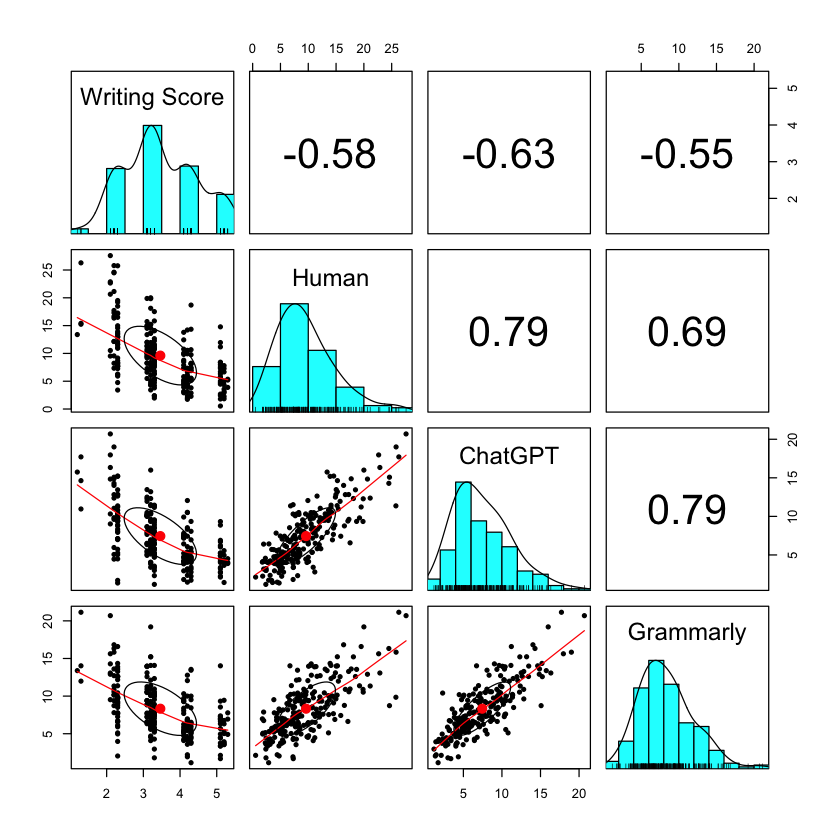

In [14]:
# Figure 7
pairs.panels(dat[,5:8], method = "spearman")

# Bayesian bootstrapped correlation coefficients

https://github.com/donaldRwilliams/BBcor

install.packages("devtools")

The package is not available on CRAN, so first download "bayeslincom_1.3.0.tar.gz" from the repository.
https://cran.r-project.org/src/contrib/Archive/bayeslincom/

Install from a stored file in a local computer.

install.packages("bayeslincom_1.3.0.tar.gz", repos = NULL, type = "source")
devtools::install_github("donaldRwilliams/BBcor")

Relation,Post.mean,Post.sd,Cred.lb,Cred.ub
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
writing_score--human,-0.58,0.04,-0.65,-0.51
writing_score--ChatGPT,-0.63,0.04,-0.69,-0.56
human--ChatGPT,0.79,0.03,0.75,0.83
writing_score--Grammarly,-0.55,0.05,-0.62,-0.46
human--Grammarly,0.69,0.03,0.63,0.74
ChatGPT--Grammarly,0.79,0.03,0.73,0.83


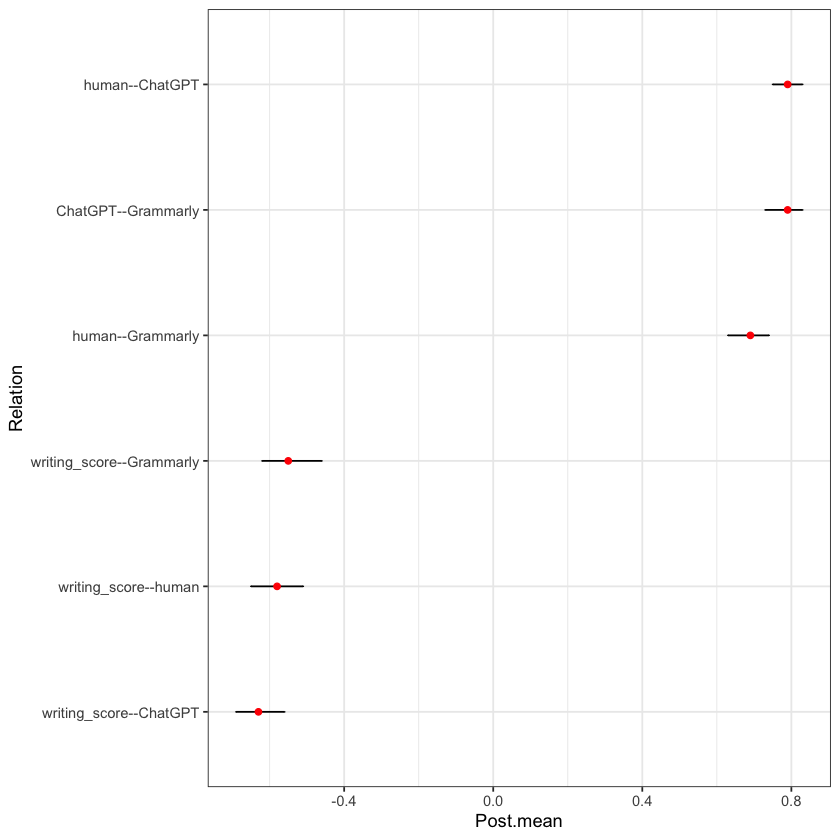

In [15]:
library(BBcor)
dat <- read.csv("accuracy_df.csv")
df <- dat[,5:8]

set.seed(114514)
bb_tau <- bbcor(df, method = "spearman", iter = 1000, cores = 1)
bb_summary <- summary(bb_tau, ci = 0.9)
bb_summary

library(ggplot2)
plot(bb_tau) + theme_bw()

## Research Question 1

------ 
Call:
lin_comb.bbcor(lin_comb = lin_comb, obj = obj, ci = ci, rope = rope, 
    contrast = contrast)
------ 
Combinations:
 C1: writing_score--human - writing_score--ChatGPT = 0 
------ 
Posterior Summary:

   Post.mean Post.sd Cred.lb Cred.ub Pr.less Pr.greater
C1      0.05    0.03   -0.01     0.1    0.06       0.94
------ 
Note:
Pr.less: Posterior probability less than zero
Pr.greater: Posterior probability greater than zero

List of 3
 $ results:List of 1
  ..$ C1:List of 8
  .. ..$ lin_comb    : chr "writing_score--human - writing_score--ChatGPT = 0"
  .. ..$ rope_overlap: NULL
  .. ..$ samples     : num [1:1000] 0.06973 0.0592 0.07311 -0.00112 0.03155 ...
  .. ..$ ci          : Named num [1:2] -0.00546 0.09581
  .. .. ..- attr(*, "names")= chr [1:2] "5%" "95%"
  .. ..$ mean_samples: num 0.0461
  .. ..$ sd_samples  : num 0.0307
  .. ..$ prob_greater: num 0.935
  .. ..$ support     : NULL
 $ ci     : num 0.9
 $ call   : language lin_comb.bbcor(lin_comb = lin_comb, obj = obj, ci = ci, rope = rope, contrast = contrast)
 - attr(*, "class")= chr "bayeslincom"


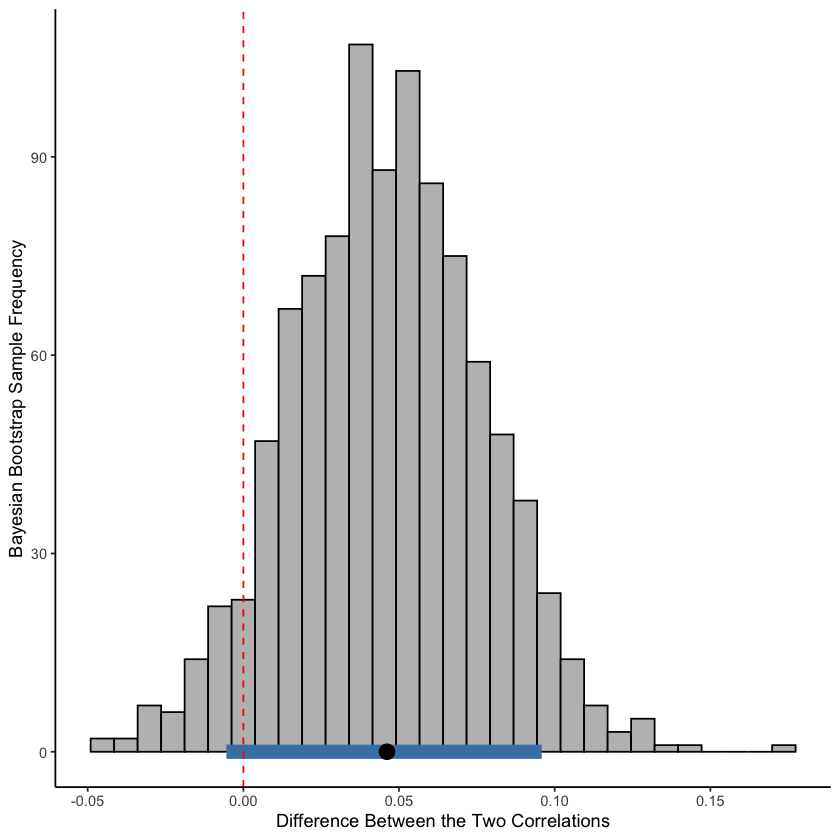

In [16]:
comparisons1 <- c("writing_score--human - writing_score--ChatGPT = 0")
post_comparisons1 <- compare(comparisons1, obj = bb_tau, cred = 0.9) #, rope = c(-0.10, 0.10)
post_comparisons1
str(post_comparisons1)

plot(post_comparisons1) +
  ggplot2::theme_classic() +
  geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
  xlab("Difference Between the Two Correlations") +
  ylab("Bayesian Bootstrap Sample Frequency")

## Research Question 2

------ 
Call:
lin_comb.bbcor(lin_comb = lin_comb, obj = obj, ci = ci, rope = rope, 
    contrast = contrast)
------ 
Combinations:
 C1: human--ChatGPT - human--Grammarly = 0 
 C2: writing_score--ChatGPT - writing_score--Grammarly = 0 
------ 
Posterior Summary:

   Post.mean Post.sd Cred.lb Cred.ub Pr.less Pr.greater
C1      0.10    0.03    0.05    0.15    0.00       1.00
C2     -0.08    0.04   -0.15   -0.02    0.98       0.02
------ 
Note:
Pr.less: Posterior probability less than zero
Pr.greater: Posterior probability greater than zero

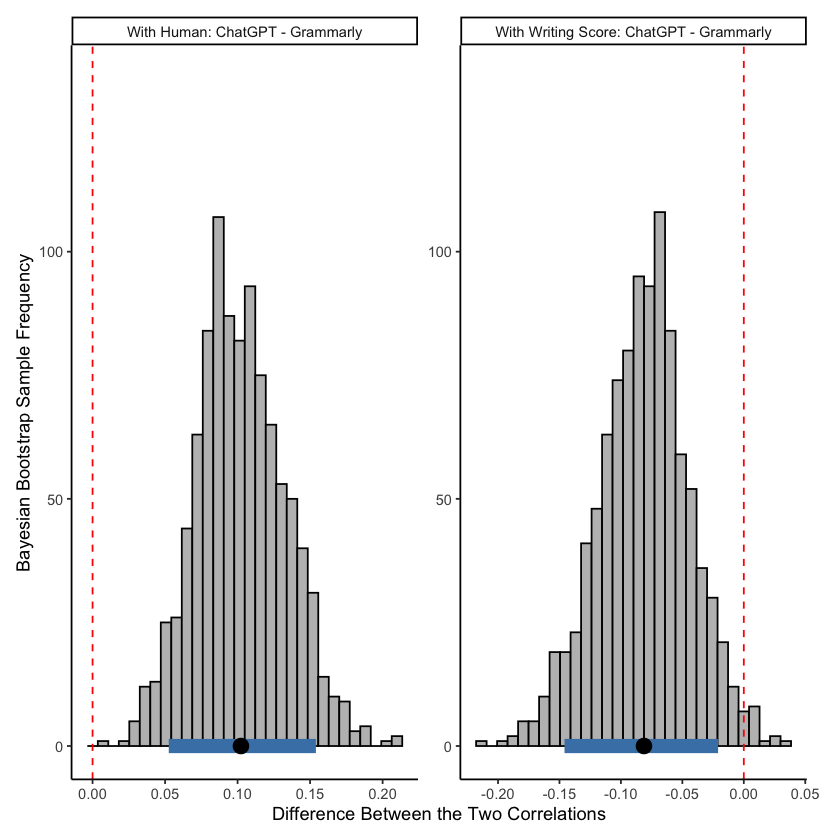

In [17]:
comparisons <- c("human--ChatGPT - human--Grammarly = 0",
                 "writing_score--ChatGPT - writing_score--Grammarly = 0")
post_comparisons <- compare(comparisons, obj = bb_tau, cred = 0.9) #, rope = c(-0.10, 0.10)
post_comparisons

# For changing the graph titles
post_comparisons$results$C1$lin_comb <- "With Human: ChatGPT - Grammarly"
post_comparisons$results$C2$lin_comb <- "With Writing Score: ChatGPT - Grammarly"

plot(post_comparisons) +
  ggplot2::theme_classic() +
  theme(plot.margin = margin(t = 10, r = 20, b = 10, l = 10, unit = "pt")) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
  xlab("Difference Between the Two Correlations") +
  ylab("Bayesian Bootstrap Sample Frequency")+
  ylim(0, 135)
